In [252]:
import pygauss as pg
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print 'pygauss version: {}'.format(pg.__version__)

pygauss version: 0.5.0


In [305]:
import os, platform
home = os.path.expanduser("~")
if platform.system() == 'Windows':
    pg.set_imagik_exe('convert_pdf')
    onedrive = 'SkyDrive'
else:
    onedrive = 'OneDrive'
inpath = os.path.join(home, onedrive, 
    'Imperial_2014-15', 'Project', 'Gaussian_files')

In [444]:
il_coronene = pg.Analysis(os.path.join(inpath, 'Coronene-IL'))

cerrs = il_coronene.add_runs(
    headers=['Surface', 'Cation', 'Anion', 'Diffuse', 'Initial'], 
    values=[['none'], ['emim'], ['none'], ['g', '+g'], ['none']],
    init_pattern='*_{1}_-_init.com',
    opt_pattern='*_{1}_-_6-311{3}-*_opt_.log',
    freq_pattern='*_{1}_-_6-311{3}-*_freq_.log',
    #nbo_pattern='*_{1}_-_6-311{3}-*_pop-nbo-full-_.log',
    atom_groups={'emim':range(1, 20)}, alignto=[3,2,1])
aerrs = il_coronene.add_runs(
    headers=['Surface', 'Cation', 'Anion', 'Diffuse', 'Initial'], 
    values=[['none'], ['none'], ['cl', 'bf', 'etso'], ['g', '+g'], ['none']],
    init_pattern='*_{2}_-_init.com',
    opt_pattern='*_{2}_-_6-311{3}-d-p-_gd3bj_opt_.log',
    freq_pattern='*_{2}_-_6-311{3}-d-p-_gd3bj_freq_.log')
serrs = il_coronene.add_runs(
    headers=['Surface', 'Cation', 'Anion', 'Diffuse', 'Initial'], 
    values=[['coro'], ['none'], ['none'], ['g', '+g'], ['none']],
    init_pattern='*_{0}_-_init.com',
    opt_pattern='*_{0}_-_6-311{3}-d-p-_gd3bj_opt_*.log',
    freq_pattern='*_{0}_-_6-311{3}-d-p-_gd3bj_freq_*.log')
error_df = pd.concat([cerrs, aerrs, serrs])

for anion, emim_atoms in zip(['cl', 'bf'], 
                             [range(38, 57), range(42, 61)]):

    atom_groups={'coro':range(1,37), 'coro_plane':[1,12,28], 'emim':emim_atoms, 'ce':range(1,37)+emim_atoms, 
                'emim_ring':list(reversed(emim_atoms[0:3])), 'c2':[emim_atoms[2]], 
                 'cl':[37], 'bf':range(37, 42), 'coro_plane':[4,7,9]}    
    emim_hs = [(2,7), (4,6), (5,5), ('6a',17), ('6b',18), ('6c',19), 
           ('7a',11), ('7b',12), ('8a',13), ('8b',14), ('8c',15)]
    for name, number in emim_hs:
        atom_groups['h{}'.format(name)] = emim_atoms[number-1]
        label = 'H{}_charge'.format(name)

    errors = il_coronene.add_runs(
        headers=['Surface', 'Cation', 'Anion', 'Initial', 'Diffuse'], 
        values=[['coro'], ['emim'], [anion],
               ['P-'+str(a) for a in range(0,360,30)]+['O-O', 'O-S1'], 
               ['+g']],
        init_pattern='CJS2_{0}-{1}-{2}_{3}_init.com',
        opt_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_opt_*.log',
        freq_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_freq_*.log',
        nbo_pattern='CJS6_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_pop-nbo-full-_*.log',
        atom_groups=atom_groups,
        alignto=[4,7,9], add_if_error=True, ipython_print=True)
    
    error_df = pd.concat([error_df, errors])

atom_groups={'coro':range(1,37), 'coro_plane':[1,12,28], 'emim':range(37, 56), 
             'ce':range(1,37)+range(37, 56), 'emim_ring':[39,38,37],
             'cl':[56], 'bf':range(56, 61), 'coro_plane':[4,7,9], 'c2':[39]}    
emim_hs = [(2,7), (4,6), (5,5), ('6a',17), ('6b',18), ('6c',19), 
       ('7a',11), ('7b',12), ('8a',13), ('8b',14), ('8c',15)]
for name, number in emim_hs:
    atom_groups['h{}'.format(name)] = 36+number
    
errors = il_coronene.add_runs(
    headers=['Surface', 'Cation', 'Anion', 'Initial', 'Diffuse'], 
    values=[['coro'], ['emim'], ['cl', 'bf'],
           ['O-S2'], ['+g']],
    init_pattern='CJS2_{0}-{1}-{2}_{3}_init.com',
    opt_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_opt_*.log',
    freq_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_freq_*.log',
    nbo_pattern='CJS6_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_pop-nbo-full-_*.log',
    atom_groups=atom_groups,
    alignto=[4,7,9], add_if_error=True, ipython_print=True)

error_df = pd.concat([error_df, errors])

for anion, emim_atoms in zip(['etso'], 
                             [range(49,68)]):
    atom_groups={'coro':range(1,37), 'coro_plane':[1,12,28], 'emim':emim_atoms, 'ce':range(1,37)+emim_atoms, 'emim_ring':list(reversed(emim_atoms[0:3])),
                     'etso':range(37,49), 'coro_plane':[4,7,9], 'c2':[emim_atoms[2]]}    
    emim_hs = [(2,7), (4,6), (5,5), ('6a',17), ('6b',18), ('6c',19), 
           ('7a',11), ('7b',12), ('8a',13), ('8b',14), ('8c',15)]
    for name, number in emim_hs:
        atom_groups['h{}'.format(name)] = emim_atoms[number-1]
    errors = il_coronene.add_runs(
        headers=['Surface', 'Cation', 'Anion', 'Initial', 'Diffuse'], 
        values=[['coro'], ['emim'], [anion],
               ['P2-'+str(a) for a in range(0,360,30)], 
               ['+g']],
        init_pattern='CJS2_{0}-{1}-{2}_{3}_init.com',
        opt_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_opt_*.log',
        freq_pattern='CJS2_{0}-{1}-{2}_{3}_6-311{4}-d-p-_gd3bj_freq_*.log',
        nbo_pattern='CJS6_{0}-{1}-{2}_{3}_6-311{4}-d-p-_*_pop-nbo-full-_*.log',
        atom_groups=atom_groups,
        alignto=[4,7,9], add_if_error=True, ipython_print=True)
    
    error_df = pd.concat([error_df, errors])

print 'Read Errors:'
error_df[error_df.Type!='nbo']

Read Errors:


,Anion,Cation,Diffuse,Initial,Surface,Type,File,Error_Message
2,bf,emim,+g,P-90,coro,freq,CJS2_coro-emim-bf_P-90_6-311+g-d-p-_gd3bj_freq...,no files of format CJS2_coro-emim-bf_P-90_6-31...
10,bf,emim,+g,O-S1,coro,freq,CJS2_coro-emim-bf_O-S1_6-311+g-d-p-_gd3bj_freq...,no files of format CJS2_coro-emim-bf_O-S1_6-31...


In [445]:
il_coronene._df['InPlane'] = il_coronene._df.Initial.str.contains('P')
il_coronene.get_table(filters={'Anion':'cl', 'Surface':'coro'})

,Anion,Cation,Diffuse,Initial,Surface,InPlane
ID,,,,,,
10,cl,emim,+g,P-0,coro,True
11,cl,emim,+g,P-30,coro,True
12,cl,emim,+g,P-60,coro,True
13,cl,emim,+g,P-90,coro,True
14,cl,emim,+g,P-120,coro,True
15,cl,emim,+g,P-150,coro,True
16,cl,emim,+g,P-180,coro,True
17,cl,emim,+g,P-210,coro,True
18,cl,emim,+g,P-240,coro,True


(A) 22, O-O, (B) 23, O-S1, (C) 38, O-S2


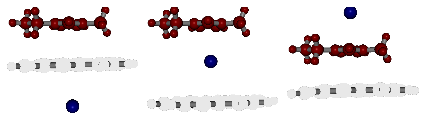

In [446]:
fig, caption = il_coronene.plot_mol_images(mtype='highlight-initial',
        highlight=['emim', 'cl'], alpha=0.1, transparent=False, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        filters={'Surface':'coro', 'Anion':'cl', 'Diffuse':'+g', 'InPlane':False},
        rotations=[[0, 90, 90]], label_size=0, align_to='emim_ring', width=1000)
print caption
fig.savefig('out_of_plane_anion_positions.png', dpi=200)

In [447]:
il_coro_confs = il_coronene.copy()
non_conformers = il_coro_confs.remove_non_conformers()
#add cl back because theres a problem with it being a single atom
#and regestering it as optimised/passing frequency analysis
il_coro_confs.add_runs(
    headers=['Surface', 'Anion', 'Cation', 'Diffuse', 'Initial'], 
    values=[['none'], ['cl'], ['none'], ['g', '+g'], ['none']],
    init_pattern='*_{1}_-_init.com',
    opt_pattern='*_{1}_-_6-311{3}-d-p-_gd3bj_opt_.log',
    freq_pattern='*_{1}_-_6-311{3}-d-p-_gd3bj_freq_.log')
#similarly with coronene and a diffuse function
il_coro_confs.add_runs(
    headers=['Surface', 'Anion', 'Cation', 'Diffuse', 'Initial'], 
    values=[['coro'], ['none'], ['none'], ['+g'], ['none']],
    init_pattern='*_{0}_-_init.com',
    opt_pattern='*_{0}_-_6-311{3}-d-p-_gd3bj_opt_*.log',
    freq_pattern='*_{0}_-_6-311{3}-d-p-_gd3bj_freq_*.log')

""


In [448]:
for anion in ['cl', 'bf', 'etso']:
    s_id, c_id, a_id = il_coro_confs.get_ids(['Surface', 'Anion', 'Cation', 'Diffuse'],
                    [['coro', 'none', 'none', '+g'], 
                     ['none', anion, 'none', '+g'], ['none', 'none', 'emim', '+g']])
    il_coro_confs.add_mol_property_subset(
        'Energy of Association (kJmol^{-1}) Uncorrected',
        'get_opt_energy', 
        kwargs={'units':'kJmol-1'}, 
        filters={'Surface':'coro', 'Diffuse':'+g',
                 'Cation':'emim', 'Anion':anion}, 
        relative_to_rows=[s_id, c_id, a_id])
    il_coro_confs.add_mol_property_subset(
        'Energy of Association (kJmol^{-1}) Corrected',
        'get_opt_energy', 
        kwargs={'units':'kJmol-1', 'zpe_correct':True}, 
        filters={'Surface':'coro', 'Diffuse':'+g',
                 'Cation':'emim', 'Anion':anion}, 
        relative_to_rows=[s_id, c_id, a_id])

for diff in ['+g', 'g']:
    ids = il_coro_confs.get_ids(
    ['Surface', 'Anion', 'Cation', 'Diffuse', 'Initial'],
    [['coro', 'none', 'none', diff, 'none'],
    ['none', 'none', 'emim', diff, 'none'],
    ['none', 'cl', 'none', diff, 'none'],
    ['none', 'bf', 'none', diff, 'none'],
    ['none', 'etso', 'none', diff, 'none']])
    df = il_coro_confs.remove_rows(ids)


In [449]:
df = il_coro_confs.get_table(
    precision=3, 
    column_index=['Energy of Association (kJmol^{-1})'])
df.sort([(' ', 'Anion'), ('Energy of Association (kJmol^{-1})','Corrected')])

\
   Anion Cation Diffuse InPlane Initial Surface   
ID                                                
35    bf   emim      +g    True   P-330    coro   
31    bf   emim      +g    True   P-210    coro   
32    bf   emim      +g    True   P-240    coro   
28    bf   emim      +g    True   P-120    coro   
26    bf   emim      +g    True    P-60    coro   
24    bf   emim      +g    True     P-0    coro   
18    cl   emim      +g    True   P-240    coro   
20    cl   emim      +g    True   P-300    coro   
19    cl   emim      +g    True   P-270    coro   
21    cl   emim      +g    True   P-330    coro   
23    cl   emim      +g   False    O-S1    coro   
17    cl   emim      +g    True   P-210    coro   
16    cl   emim      +g    True   P-180    coro   
15    cl   emim      +g    True   P-150    coro   
13    cl   emim      +g    True    P-90    coro   
14    cl   emim      +g    True   P-120    coro   
11    cl   emim      +g    True    P-30    coro   
12    cl   emim      +g    True    P-60    coro   
10    cl   emim      +g    True     P-0    coro   
22    cl   emim      +g   False     O-O    coro   
49  etso   emim      +g    True  P2-270    coro   
48  etso   emim      +g    True  P2-240    coro   
50  etso   emim      +g    True  P2-300    coro   
46  etso   emim      +g    True  P2-180    coro   
43  etso   emim      +g    True   P2-90    coro   
44  etso   emim      +g    True  P2-120    coro   
45  etso   emim      +g    True  P2-150    coro   

   Energy of Association (kJmol^{-1})            
                          Uncorrected Corrected  
ID                                               
35                            -455.87   -442.58  
31                            -451.13   -437.34  
32                            -445.22   -431.83  
28                            -433.93   -420.54  
26                            -427.94   -415.20  
24                            -428.45   -414.17  
18                            -481.31   -472.45  
20                            -481.25   -472.28  
19                            -481.25   -472.28  
21                            -481.25   -472.28  
23                            -476.88   -467.11  
17                            -472.47   -463.13  
16                            -472.47   -463.12  
15                            -463.41   -453.41  
13                            -463.41   -453.41  
14                            -463.41   -453.39  
11                            -457.33   -446.61  
12                            -457.33   -446.61  
10                            -457.33   -446.60  
22                            -339.93   -331.46  
49                            -485.85   -472.00  
48                            -467.69   -453.99  
50                            -466.68   -452.07  
46                            -464.76   -449.72  
43                            -455.41   -440.67  
44                            -455.15   -440.51  
45                            -455.15   -440.51

(A) 10, P-0, (B) 11, P-30, (C) 12, P-60, (D) 13, P-90, (E) 14, P-120, (F) 15, P-150, (G) 16, P-180, (H) 17, P-210, (I) 18, P-240, (J) 19, P-270, (K) 20, P-300, (L) 21, P-330, (M) 22, O-O, (N) 23, O-S1


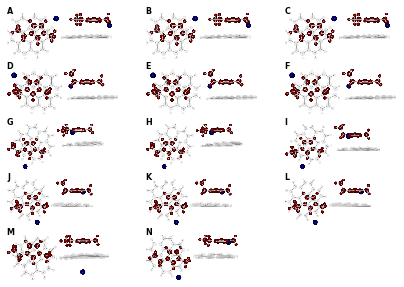

In [450]:
for anion in ['cl']:
    fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
            highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
            info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
            filters={'Surface':'coro', 'Anion':anion, 'Diffuse':'+g'},
            rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
    print caption

(A) 10, P-0, (B) 11, P-30, (C) 12, P-60


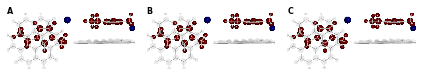

In [451]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[10,11,12],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 16, P-180, (B) 17, P-210


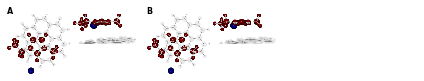

In [452]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[16,17],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 23, O-S1


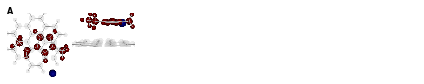

In [453]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[23],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 13, P-90, (B) 14, P-120, (C) 15, P-150


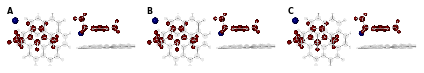

In [454]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[13,14,15],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 19, P-270, (B) 20, P-300, (C) 21, P-330


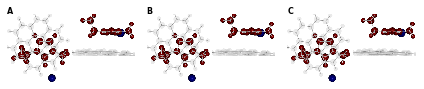

In [455]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[19,20,21],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 22, O-O


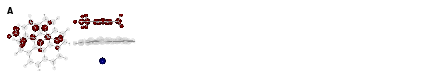

In [456]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[22],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

final conformers

(A) 10, P-0, (B) 16, P-180, (C) 23, O-S1, (D) 13, P-90, (E) 19, P-270, (F) 22, O-O


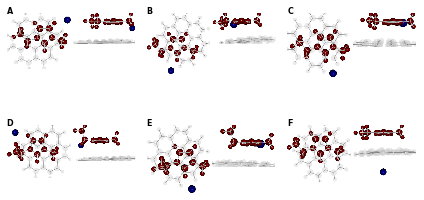

In [457]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[10,16,23,13,19,22],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 24, P-0, (B) 26, P-60, (C) 28, P-120, (D) 31, P-210, (E) 32, P-240, (F) 35, P-330


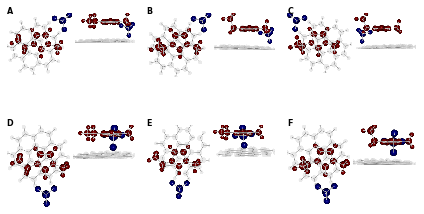

In [458]:
for anion in ['bf']:
    fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
            highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
            info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
            filters={'Surface':'coro', 'Anion':anion, 'Diffuse':'+g'},
            rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
    print caption

final conformers

(A) 24, P-0, (B) 28, P-120, (C) 31, P-210, (D) 35, P-330


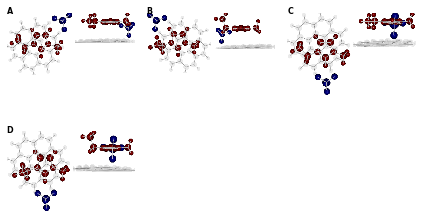

In [459]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', 'bf'], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[24,28,31,35],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

(A) 43, P2-90, (B) 44, P2-120, (C) 45, P2-150, (D) 46, P2-180, (E) 48, P2-240, (F) 49, P2-270, (G) 50, P2-300


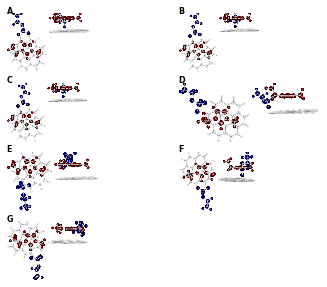

In [460]:
for anion in ['etso']:
    fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
            highlight=['emim', anion], alpha=0.1, transparent=True, info_incl_id=True,
            info_columns=['Initial'], max_cols=2, padding=(1,1),                                   
            filters={'Surface':'coro', 'Anion':anion, 'Diffuse':'+g'},
            rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
    print caption

(A) 43, P2-90, (B) 44, P2-120, (C) 46, P2-180, (D) 48, P2-240, (E) 49, P2-270, (F) 50, P2-300


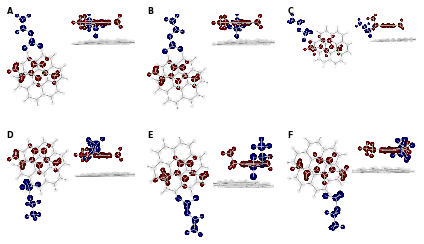

In [461]:
fig, caption = il_coro_confs.plot_mol_images(mtype='highlight',
        highlight=['emim', 'etso'], alpha=0.1, transparent=True, info_incl_id=True,
        info_columns=['Initial'], max_cols=3, padding=(1,1),                                   
        rows=[43, 44, 46, 48, 49, 50],
        rotations=[[0, 0, 90], [0, 90, 90]], label_size=8, align_to='emim_ring')
print caption

NB: 43 is marginally different to 44 in etso4 chain orientation

In [462]:
#leaving out 22 where cl below plane
df = il_coro_confs.remove_rows(
    set(il_coro_confs.get_table().index).difference(
    [10,16,23,13,19,24,28,31,35,43,46,48,49,50]))

(9A) 19, P-270, (9B) 23, O-S1, (9C) 16, P-180, (9D) 13, P-90, (9E) 10, P-0
(10A) 35, P-330, (10B) 31, P-210, (10C) 28, P-120, (10D) 24, P-0
(11A) 49, P2-270, (11B) 48, P2-240, (11C) 50, P2-300, (11D) 46, P2-180, (11E) 43, P2-90


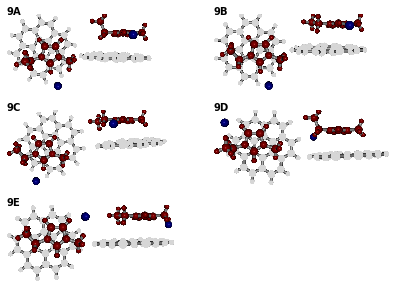

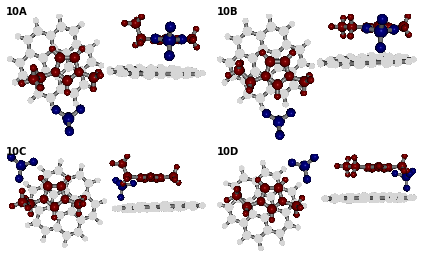

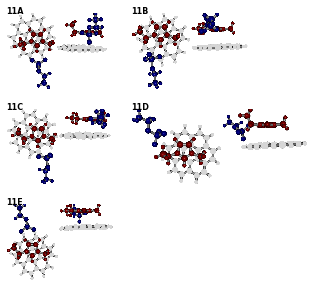

In [463]:
def il_coro_show(anion, letter, mtype='highlight', padding=(1,2), label_size=10):
    fig, caption = il_coro_confs.plot_mol_images(mtype=mtype, letter_prefix=letter,
            highlight=['emim', anion], alpha=0.2, transparent=False, info_incl_id=True,
            info_columns=['Initial'], max_cols=2, padding=padding,                                   
            filters={'Surface':'coro', 'Anion':anion, 'Diffuse':'+g'},
            rotations=[[0, 0, 90], [0, 90, 90]], label_size=label_size, align_to='emim_ring',
            sort_columns=['Energy of Association (kJmol^{-1}) Corrected'], width=1000)
    print caption
    return fig

fig_ecl = il_coro_show('cl', '9')
fig_ebf = il_coro_show('bf','10')
fig_eetso = il_coro_show('etso', '11', padding=(-10,2), label_size=8)

(9A) 19, P-270, (9B) 23, O-S1, (9C) 16, P-180, (9D) 13, P-90, (9E) 10, P-0
(10A) 35, P-330, (10B) 31, P-210, (10C) 28, P-120, (10D) 24, P-0
(11A) 49, P2-270, (11B) 48, P2-240, (11C) 50, P2-300, (11D) 46, P2-180, (11E) 43, P2-90


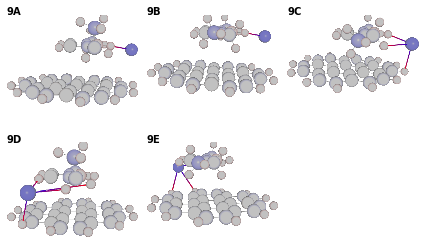

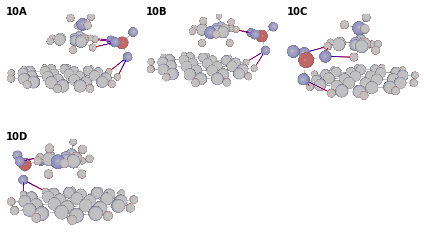

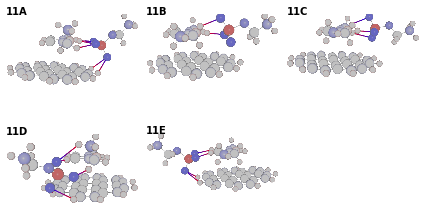

In [464]:
def il_coro_show2(anion, letter, mtype='hbond', padding=(1,2), label_size=10):
    fig, caption = il_coro_confs.plot_mol_images(mtype=mtype, letter_prefix=letter,sopt_min_energy=1,
            atom_groups=['ce', anion],
            highlight=['emim', anion], alpha=0.6, transparent=False, info_incl_id=True,
            info_columns=['Initial'], max_cols=3, padding=padding,                                   
            filters={'Surface':'coro', 'Anion':anion, 'Diffuse':'+g'},
            rotations=[[80, 0, 0]], label_size=label_size, align_to='emim_ring',
            sort_columns=['Energy of Association (kJmol^{-1}) Corrected'], width=1000)
    print caption
    return fig

fig_ecl = il_coro_show2('cl', '9')
fig_ebf = il_coro_show2('bf','10')
fig_eetso = il_coro_show2('etso', '11', padding=(1,2), label_size=10)

(9A) 19, P-270, (9B) 23, O-S1, (9C) 16, P-180, (9D) 13, P-90, (9E) 10, P-0
(10A) 35, P-330, (10B) 31, P-210, (10C) 28, P-120, (10D) 24, P-0
(11A) 49, P2-270, (11B) 48, P2-240, (11C) 50, P2-300, (11D) 46, P2-180, (11E) 43, P2-90


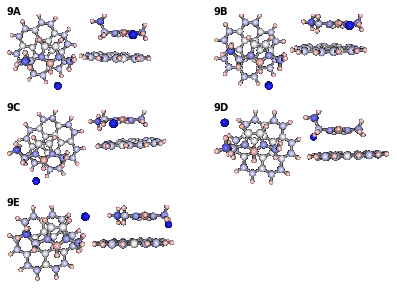

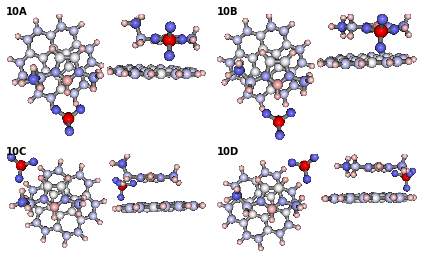

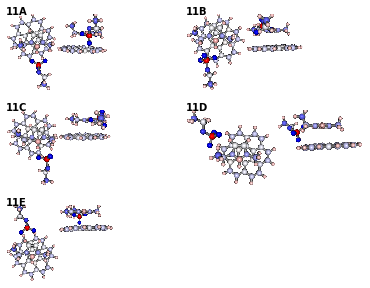

In [465]:
fig_ccl = il_coro_show('cl', '9', mtype='nbo')
fig_cbf = il_coro_show('bf','10', mtype='nbo')
fig_cetso = il_coro_show('etso', '11', mtype='nbo')

In [466]:
import string
il_coro_confs._df['Order'] = il_coro_confs._df['Anion'].replace(['cl', 'bf', 'etso'], [1,2,3])
il_coro_confs._df.sort(['Order', 'Energy of Association (kJmol^{-1}) Corrected'], inplace=True)
il_coro_confs._df['Letter']=['9A', '9B', '9C', '9D', '9E', 
                             '10A', '10B', '10C', '10D', '11A', '11B', '11C', '11D', '11E']
il_coro_confs._df['Initials']=['P270,P300,P330', 'O-S1', 'P180,P210', 'P90,P120,P150', 'P0,P30,P60', 
                             'P330', 'P210,P240', 'P120', 'P0,P60',
                               'P270', 'P240', 'P300', 'P180', 'P90,P120,P150']
il_coro_confs.get_table()

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,Initials
ID,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.250,-472.276,1,9A,"P270,P300,P330"
23,cl,emim,+g,False,O-S1,coro,-476.885,-467.110,1,9B,O-S1
16,cl,emim,+g,True,P-180,coro,-472.468,-463.121,1,9C,"P180,P210"
13,cl,emim,+g,True,P-90,coro,-463.408,-453.410,1,9D,"P90,P120,P150"
10,cl,emim,+g,True,P-0,coro,-457.326,-446.600,1,9E,"P0,P30,P60"
35,bf,emim,+g,True,P-330,coro,-455.869,-442.584,2,10A,P330
31,bf,emim,+g,True,P-210,coro,-451.128,-437.339,2,10B,"P210,P240"
28,bf,emim,+g,True,P-120,coro,-433.934,-420.542,2,10C,P120
24,bf,emim,+g,True,P-0,coro,-428.445,-414.171,2,10D,"P0,P60"


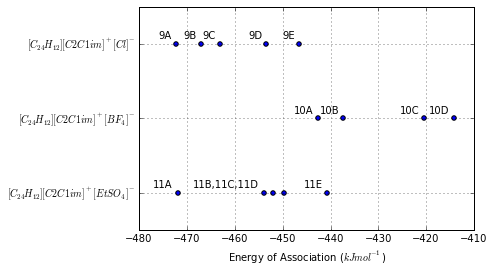

In [467]:
import string
import copy
def plt_value(analysis, x_col, y_col, 
                 ytick_names, ytick_labels,
                 x_label=None, y_label=None,
                filters={}, ax=None, combine_gap=1.):
    df = analysis.get_table(filters=filters).sort([y_col, x_col])
    df = df.replace(ytick_names, range(1,len(ytick_names)+1))
    df = df.sort(y_col)
    ax = df.plot(kind='scatter', y=y_col, x=x_col, ax=ax)
    ax.grid(True)
    ax.set_yticks(range(1,len(ytick_names)+1))
    ax.set_yticklabels(ytick_labels)
    ax.set_ylabel('')
    if x_label: ax.set_xlabel(x_label)
    X0, Y0 = None, None
    for X, Y, Z in zip(df[x_col], df[y_col], df.Letter):
        # Annotate the points 5 _points_ above and to the left of the vertex
        if not X0==None:
            if Y==Y0 and X-X0<combine_gap:
                A0.set_text(','.join([A0.get_text(),Z]))
                X0, Y0 = X,Y
                continue

        A0 = ax.annotate(Z, xy=(X,Y), xytext=(-5, 5), ha='right',
                    textcoords='offset points')
        X0, Y0 = X,Y
        
    ax.invert_yaxis()
    return ax

ax_energy = plt_value(il_coro_confs, 'Energy of Association (kJmol^{-1}) Corrected', 'Anion', 
                  ['cl', 'bf', 'etso'], 
                ['$[C_{24}H_{12}][C2C1im]^+[Cl]^-$', '$[C_{24}H_{12}][C2C1im]^+[BF_4]^-$', 
                 '$[C_{24}H_{12}][C2C1im]^+[EtSO_4]^-$'],
                 x_label='Energy of Association ($kJmol^{-1}$)',
                 filters={'Cation':'emim'}, combine_gap=3)

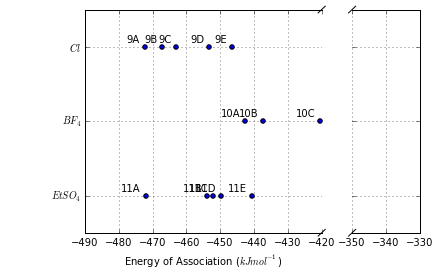

In [468]:
fig1,(ax1,ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios':[7, 2]})
ax1 = plt_value(il_coro_confs, 'Energy of Association (kJmol^{-1}) Corrected', 'Anion', 
                  ['cl', 'bf', 'etso'], ['$Cl$', '$BF_4$', '$EtSO_4$'],
                 x_label='Energy of Association ($kJmol^{-1}$)',
                 filters={'Cation':'emim'}, ax=ax1)
ax2 = plt_value(il_coro_confs, 'Energy of Association (kJmol^{-1}) Corrected', 'Anion', 
                  ['cl', 'bf', 'etso'], ['$Cl$', '$BF_4$', '$EtSO_4$'],
                 x_label='Energy of Association ($kJmol^{-1}$)',
                 filters={'Cation':'emim'}, ax=ax2)
ax1.set_ylim(0.5, 3.5)
ax1.set_xlim(-490, -420)
ax2.set_xlim(-350, -330)
ax2.set_xticks([-350, -340, -330])
ax2.set_ylabel('')
ax2.set_xlabel('')
ax1.invert_yaxis()

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labeltop='off') # don't put tick labels at the top
#ax2.yaxis.tick_right()

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.2)

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-left diagonal

kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d*7/2.,d*7/2.),(-d,+d), **kwargs) # top-right diagonal
ax2.plot((-d*7/2.,d*7/2.),(1-d,1+d), **kwargs) # bottom-right diagonal


In [469]:
il_coro_confs.add_mol_property_subset('cat_coro_dist', 'calc_min_dist', 
                                      args=['emim', 'coro'], kwargs={'units':'Angstrom'})
il_coro_confs.add_mol_property_subset('ring_coro_dist', 'calc_min_dist', 
                                      args=['emim_ring', 'coro'], kwargs={'units':'Angstrom'})
for ana in ['cl', 'bf', 'etso']:
    il_coro_confs.add_mol_property_subset('an_coro_dist', 'calc_min_dist', 
                                      args=[ana, 'coro'], kwargs={'units':'Angstrom'},
                                    filters={'Anion':ana})
    il_coro_confs.add_mol_property_subset('an_cat_dist', 'calc_min_dist', 
                                      args=[ana, 'emim'], kwargs={'units':'Angstrom'},
                                    filters={'Anion':ana})
il_coro_confs.get_table()

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,Initials,cat_coro_dist,ring_coro_dist,an_coro_dist,an_cat_dist
ID,,,,,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.250,-472.276,1,9A,"P270,P300,P330",2.794,3.338,3.009,2.099
23,cl,emim,+g,False,O-S1,coro,-476.885,-467.110,1,9B,O-S1,2.563,3.272,3.082,2.129
16,cl,emim,+g,True,P-180,coro,-472.468,-463.121,1,9C,"P180,P210",2.627,3.358,2.918,2.114
13,cl,emim,+g,True,P-90,coro,-463.408,-453.410,1,9D,"P90,P120,P150",2.722,3.250,2.905,2.285
10,cl,emim,+g,True,P-0,coro,-457.326,-446.600,1,9E,"P0,P30,P60",2.482,3.276,2.751,2.293
35,bf,emim,+g,True,P-330,coro,-455.869,-442.584,2,10A,P330,2.746,3.361,2.402,1.958
31,bf,emim,+g,True,P-210,coro,-451.128,-437.339,2,10B,"P210,P240",2.683,3.346,2.318,1.954
28,bf,emim,+g,True,P-120,coro,-433.934,-420.542,2,10C,P120,2.661,3.278,2.315,1.953
24,bf,emim,+g,True,P-0,coro,-428.445,-414.171,2,10D,"P0,P60",2.514,3.282,2.271,1.958


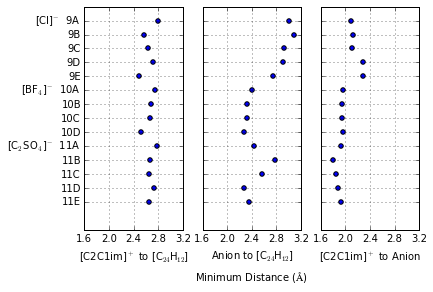

In [535]:
fig_dist,(ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
df = il_coro_confs.get_table()
ax1.scatter(df['cat_coro_dist'], range(1,15))
ax1.set_xlabel('[C2C1im]$^+$ to [C$_{24}$H$_{12}$]')
ax1.grid(True)
ax2.scatter(df['an_coro_dist'], range(1,15))
ax2.set_xlabel('Anion to [C$_{24}$H$_{12}$]')
ax2.grid(True)
ax3.scatter(df['an_cat_dist'], range(1,15))
ax3.set_xlabel('[C2C1im]$^+$ to Anion')
ax3.grid(True)

ax1.set_yticks(range(1,15))
ax1.set_xticks([1.6, 2, 2.4, 2.8, 3.2])
ion_dict={
    'emim':'[C2C1im]$^+$',
    'omim':'[C4C1im]$^+$',
    'cl':'[Cl]$^-$',
    'bf':'[BF$_4$]$^-$',
    'etso':'[C$_2$SO$_4$]$^-$'}
ylabels=[]
last=None
for ix, rw in df.iterrows():
    if (rw.Cation, rw.Anion)!=last:
        ylabels.append(''.join([ion_dict[rw.Anion],' ',rw.Letter]))
#        ylabels.append(''.join([ion_dict[rw.Cation],ion_dict[rw.Anion],' ',rw.Letter]))
    else:
        ylabels.append(rw.Letter)
    last = (rw.Cation, rw.Anion)
ax1.set_yticklabels(ylabels)

# The big subplot for x label
ax = fig_dist.add_subplot(111)    
ax.tick_params(top='off', bottom='off', left='off', right='off',
               labelbottom='on', labelleft='on', pad=35)
ax.set_xticklabels([])
ax.set_yticklabels([])           
ax.set_frame_on(False)
ax.set_xlabel(r'Minimum Distance ($\AA$)') 

ax1.invert_yaxis()

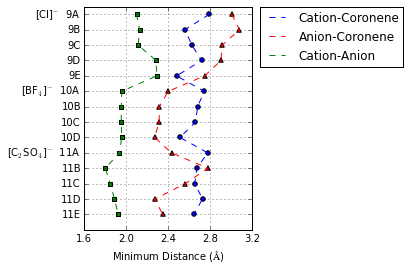

In [553]:
fig_dist,ax1 = plt.subplots(1, 1, sharey=True, sharex=True)
df = il_coro_confs.get_table()
ax1.scatter(df['cat_coro_dist'], range(1,15))
ax1.plot(df['cat_coro_dist'], range(1,15), '--')
ax1.scatter(df['an_coro_dist'], range(1,15), c='r', marker='^')
ax1.plot(df['an_coro_dist'], range(1,15), 'r--')
ax1.scatter(df['an_cat_dist'], range(1,15), c='g', marker='s')
ax1.plot(df['an_cat_dist'], range(1,15), 'g--')
ax1.set_xlabel(r'Minimum Distance ($\AA$)')
ax1.grid(True)

ax1.set_yticks(range(1,15))
ax1.set_ybound(0.5,15)
ax1.set_xticks([1.6, 2, 2.4, 2.8, 3.2])
ion_dict={
    'emim':'[C2C1im]$^+$',
    'omim':'[C4C1im]$^+$',
    'cl':'[Cl]$^-$',
    'bf':'[BF$_4$]$^-$',
    'etso':'[C$_2$SO$_4$]$^-$'}
ylabels=[]
last=None
for ix, rw in df.iterrows():
    if (rw.Cation, rw.Anion)!=last:
        ylabels.append(''.join([ion_dict[rw.Anion],' ',rw.Letter]))
#        ylabels.append(''.join([ion_dict[rw.Cation],ion_dict[rw.Anion],' ',rw.Letter]))
    else:
        ylabels.append(rw.Letter)
    last = (rw.Cation, rw.Anion)
ax1.set_yticklabels(ylabels)
ax1.legend(['Cation-Coronene', 'Anion-Coronene', 'Cation-Anion'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
                      prop={'size':12})


ax1.invert_yaxis()
fig_dist.set_size_inches(3,4)

In [488]:
il_coro_confs.add_mol_property_subset('coro_charge', 'calc_nbo_charge', 
                                      args=['coro'])
il_coro_confs.add_mol_property_subset('cat_charge', 'calc_nbo_charge', 
                                      args=['emim'])
il_coro_confs.add_mol_property_subset('C2_charge', 'calc_nbo_charge', 
                                      args=['c2'])
emim_hs = [(2,7), (4,6), (5,5), ('6a',17), ('6b',18), ('6c',19), 
       ('7a',11), ('7b',12), ('8a',13), ('8b',14), ('8c',15)]
for name, number in emim_hs:
    il_coro_confs.add_mol_property_subset('H{}_charge'.format(name), 'calc_nbo_charge', 
                                      args=['h{}'.format(name)])

for ana in ['cl', 'bf', 'etso']:
    il_coro_confs.add_mol_property_subset('an_charge', 'calc_nbo_charge', 
                                      args=[ana], filters={'Anion':ana})
il_coro_confs._df['Charge_Transfer'] = 1-il_coro_confs._df['cat_charge']
il_coro_confs.get_table(precision=3)

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,...,H4_charge,H5_charge,H6a_charge,H6b_charge,H6c_charge,H7a_charge,H7b_charge,H8a_charge,H8b_charge,H8c_charge
ID,,,,,,,,,,,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.25,-472.28,1,9A,...,0.23,0.24,0.21,0.20,0.28,0.23,0.22,0.22,0.21,0.20
23,cl,emim,+g,False,O-S1,coro,-476.88,-467.11,1,9B,...,0.23,0.24,0.28,0.20,0.20,0.21,0.23,0.23,0.20,0.21
16,cl,emim,+g,True,P-180,coro,-472.47,-463.12,1,9C,...,0.24,0.24,0.22,0.21,0.23,0.21,0.26,0.22,0.20,0.21
13,cl,emim,+g,True,P-90,coro,-463.41,-453.41,1,9D,...,0.24,0.30,0.23,0.21,0.22,0.19,0.28,0.22,0.19,0.23
10,cl,emim,+g,True,P-0,coro,-457.33,-446.60,1,9E,...,0.30,0.24,0.29,0.20,0.20,0.20,0.23,0.23,0.21,0.22
35,bf,emim,+g,True,P-330,coro,-455.87,-442.58,2,10A,...,0.24,0.24,0.21,0.21,0.26,0.25,0.21,0.22,0.22,0.20
31,bf,emim,+g,True,P-210,coro,-451.13,-437.34,2,10B,...,0.24,0.24,0.21,0.21,0.26,0.22,0.24,0.23,0.20,0.22
28,bf,emim,+g,True,P-120,coro,-433.93,-420.54,2,10C,...,0.24,0.30,0.23,0.21,0.22,0.20,0.26,0.22,0.19,0.23
24,bf,emim,+g,True,P-0,coro,-428.45,-414.17,2,10D,...,0.30,0.24,0.28,0.21,0.21,0.20,0.23,0.23,0.21,0.22


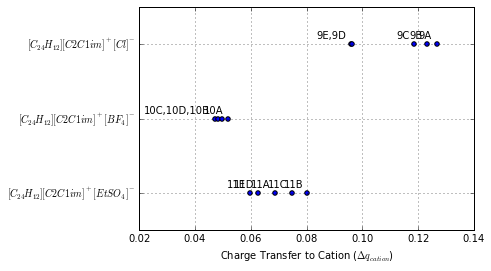

In [472]:
ax_charge = plt_value(il_coro_confs, 'Charge_Transfer', 'Anion', 
                  ['cl', 'bf', 'etso'], 
                ['$[C_{24}H_{12}][C2C1im]^+[Cl]^-$', '$[C_{24}H_{12}][C2C1im]^+[BF_4]^-$', 
                 '$[C_{24}H_{12}][C2C1im]^+[EtSO_4]^-$'],
                 x_label=r'Charge Transfer to Cation ($\Delta q_{cation}$)',
                 filters={'Cation':'emim'}, combine_gap=0.002)

In [473]:
il_coro_confs.add_mol_property_subset('H-bond coro-cat', 'calc_hbond_energy', args=[['coro', 'emim']])
il_coro_confs.add_mol_property_subset('Other-bond coro-cat', 'calc_sopt_energy', args=[['coro', 'emim']], 
                                      kwargs={'no_hbonds':True})

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,...,an_coro_dist,an_cat_dist,coro_charge,cat_charge,C2_charge,H2_charge,an_charge,Charge_Transfer,H-bond coro-cat,Other-bond coro-cat
ID,,,,,,,,,,,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.250,-472.276,1,9A,...,3.009,2.099,-0.006,0.873,0.280,0.293,-0.867,0.127,0.000,32.886
23,cl,emim,+g,False,O-S1,coro,-476.885,-467.110,1,9B,...,3.082,2.129,-0.006,0.877,0.279,0.293,-0.871,0.123,0.000,31.380
16,cl,emim,+g,True,P-180,coro,-472.468,-463.121,1,9C,...,2.918,2.114,-0.008,0.881,0.279,0.293,-0.874,0.119,0.000,27.363
13,cl,emim,+g,True,P-90,coro,-463.408,-453.410,1,9D,...,2.905,2.285,-0.007,0.904,0.276,0.231,-0.897,0.096,0.000,29.204
10,cl,emim,+g,True,P-0,coro,-457.326,-446.600,1,9E,...,2.751,2.293,-0.012,0.904,0.271,0.229,-0.892,0.096,0.000,27.907
35,bf,emim,+g,True,P-330,coro,-455.869,-442.584,2,10A,...,2.402,1.958,0.005,0.948,0.299,0.297,-0.953,0.052,0.000,27.782
31,bf,emim,+g,True,P-210,coro,-451.128,-437.339,2,10B,...,2.318,1.954,0.004,0.950,0.298,0.296,-0.954,0.050,0.377,44.016
28,bf,emim,+g,True,P-120,coro,-433.934,-420.542,2,10C,...,2.315,1.953,0.005,0.953,0.279,0.233,-0.958,0.047,0.000,27.489
24,bf,emim,+g,True,P-0,coro,-428.445,-414.171,2,10D,...,2.271,1.958,0.003,0.952,0.274,0.231,-0.954,0.048,0.000,53.430


In [474]:
for ani in ['cl', 'bf', 'etso']:
    il_coro_confs.add_mol_property_subset('H-bond coro-an', 'calc_hbond_energy', args=[['coro', ani]],
                                         filters={'Anion':ani})
    il_coro_confs.add_mol_property_subset('Other-bond coro-an', 'calc_sopt_energy', args=[['coro', ani]], 
                                          kwargs={'no_hbonds':True}, filters={'Anion':ani})    
    il_coro_confs.add_mol_property_subset('H-bond cat-an', 'calc_hbond_energy', args=[['emim', ani]],
                                         filters={'Anion':ani})
    il_coro_confs.add_mol_property_subset('Other-bond cat-an', 'calc_sopt_energy', args=[['emim', ani]], 
                                          kwargs={'no_hbonds':True}, filters={'Anion':ani})    
il_coro_confs.get_table(precision=3)

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,...,C2_charge,H2_charge,an_charge,Charge_Transfer,H-bond coro-cat,Other-bond coro-cat,H-bond coro-an,Other-bond coro-an,H-bond cat-an,Other-bond cat-an
ID,,,,,,,,,,,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.25,-472.28,1,9A,...,0.28,0.29,-0.87,0.13,0.00,32.89,1.17,7.41,131.13,13.51
23,cl,emim,+g,False,O-S1,coro,-476.88,-467.11,1,9B,...,0.28,0.29,-0.87,0.12,0.00,31.38,0.29,8.70,124.35,12.34
16,cl,emim,+g,True,P-180,coro,-472.47,-463.12,1,9C,...,0.28,0.29,-0.87,0.12,0.00,27.36,2.18,7.28,114.60,15.44
13,cl,emim,+g,True,P-90,coro,-463.41,-453.41,1,9D,...,0.28,0.23,-0.90,0.10,0.00,29.20,3.81,7.87,78.37,6.65
10,cl,emim,+g,True,P-0,coro,-457.33,-446.60,1,9E,...,0.27,0.23,-0.89,0.10,0.00,27.91,9.04,6.57,83.60,7.28
35,bf,emim,+g,True,P-330,coro,-455.87,-442.58,2,10A,...,0.30,0.30,-0.95,0.05,0.00,27.78,5.90,4.90,58.53,11.59
31,bf,emim,+g,True,P-210,coro,-451.13,-437.34,2,10B,...,0.30,0.30,-0.95,0.05,0.38,44.02,7.87,4.44,54.89,10.08
28,bf,emim,+g,True,P-120,coro,-433.93,-420.54,2,10C,...,0.28,0.23,-0.96,0.05,0.00,27.49,10.42,3.97,46.36,5.77
24,bf,emim,+g,True,P-0,coro,-428.45,-414.17,2,10D,...,0.27,0.23,-0.95,0.05,0.00,53.43,12.30,4.69,52.26,6.86


In [475]:
for anion, mol in zip(il_coro_confs._df.Anion, il_coro_confs._df.Molecule):
    print '-----'
    a= mol.get_hbond_analysis(atom_groups=['coro', anion])
    a['D']=[str(_) for _ in a.Donors]
    a['A']=[str(_) for _ in a.Acceptors]
    print a.groupby(['D', 'A']).E2.sum()

-----
D     A       
[37]  [1, 19]     0.59
      [23, 26]    0.59
Name: E2, dtype: float64
-----
D     A       
[37]  [16, 17]    0.29
Name: E2, dtype: float64
-----
D     A       
[37]  [1, 19]     0.84
      [23, 26]    1.34
Name: E2, dtype: float64
-----
D     A       
[37]  [1, 19]     2.01
      [23, 26]    1.80
Name: E2, dtype: float64
-----
D     A       
[37]  [1, 19]     4.94
      [23, 26]    4.10
Name: E2, dtype: float64
-----
D     A       
[40]  [16, 17]    2.85
      [6, 20]     3.05
Name: E2, dtype: float64
-----
D     A       
[40]  [1, 19]     3.10
      [23, 26]    4.77
Name: E2, dtype: float64
-----
D     A       
[40]  [1, 19]     5.15
      [23, 26]    5.27
Name: E2, dtype: float64
-----
D     A       
[40]  [1, 19]     6.74
      [23, 26]    5.56
Name: E2, dtype: float64
-----
D     A       
[41]  [16, 17]    4.64
      [6, 20]     4.60
Name: E2, dtype: float64
-----
Series([], Name: E2, dtype: float64)
-----
D     A       
[40]  [16, 17]    1.13
      [6, 20]   

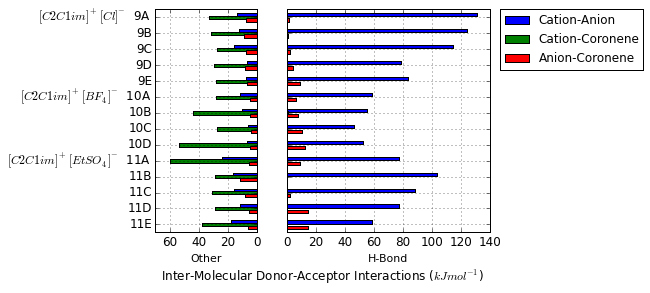

In [525]:
fig_sopt,(ax1,ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios':[1, 2]})
df = il_coro_confs._df.sort(['Order', 'Letter'])
df.plot(kind='barh', 
        y=['Other-bond {}'.format(t) for t in ['cat-an', 'coro-cat', 'coro-an']] , x='Letter', 
        ax=ax1, legend=False, fontsize=12)
for container in ax1.containers:
    plt.setp(container, height=0.2)
ax1.grid(True)
ax1.set_xlim(0, 70)
ax1.set_xticks([0,20,40,60])
ax1.set_ylabel('')
ax1.set_xlabel('Other', fontdict={'fontsize':11})
ax1.invert_xaxis()
df.plot(kind='barh', y=['H-bond {}'.format(t) for t in ['cat-an', 'coro-cat', 'coro-an']], x='Letter', 
        ax=ax2, legend=False, fontsize=12)
for container in ax2.containers:
    plt.setp(container, height=0.2)
ax2.grid(True)
ax2.set_xlim(0, 140)
ax2.set_ylabel('')
ax2.set_xlabel('H-Bond', fontdict={'fontsize':11})
ax2.legend(['Cation-Anion', 'Cation-Coronene', 'Anion-Coronene'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
                      prop={'size':12})

ion_dict={
    'emim':'[C2C1im]^+',
    'omim':'[C4C1im]^+',
    'cl':'[Cl]^-',
    'bf':'[BF_4]^-',
    'etso':'[EtSO_4]^-'}
ylabels=[]
last=None
for ix, rw in df.iterrows():
    if (rw.Cation, rw.Anion)!=last:
        ylabels.append(''.join(['$',ion_dict[rw.Cation],ion_dict[rw.Anion],'$ ',rw.Letter]))
    else:
        ylabels.append(rw.Letter)
    last = (rw.Cation, rw.Anion)
ax1.set_yticklabels(ylabels)
ax1.invert_yaxis()

# The big subplot for x label
ax = fig_sopt.add_subplot(111)    
ax.tick_params(top='off', bottom='off', left='off', right='off',
               labelbottom='on', labelleft='on', pad=30)
ax.set_xticklabels([])
ax.set_yticklabels([])           
ax.set_frame_on(False)
ax.set_xlabel('Inter-Molecular Donor-Acceptor Interactions ($kJmol^{-1}$)', fontdict={'fontsize':12})  #from Second-Order Perturbative 
fig_sopt.set_size_inches(6,4)
fig_sopt.savefig('test', dpi=400, bbox_inches='tight')

In [477]:
for anion, l in zip(['cl', 'bf', 'etso'], ['A', 'F', 'J'], []):
    fig, caption = il_coro_confs.plot_mol_graphs(gtype='dos', max_cols=3,
                            per_energy=1, lbound=-25, ubound=5, start_letter=l,
                            filters={'Anion':anion}, legend_size=8,
                            info_incl_id=True,
                            atom_groups=['emim', anion], group_colors=['blue', 'magenta'],
                            group_labels=['EMIM', anion.upper()], group_fill=False)
    for ax in fig.get_axes():
        l = ax.get_legend()
        if l: 
            l.set_visible(False)
        else:
            ax0.legend(['HOMO', 'LUMO', '[C2C1im]', anion.upper()], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
                      prop={'size':10})
            break
        ax0 = ax

In [478]:
il_coro_confs.get_table(filters={'Cation':'emim'}).sort(['Order', 'Letter'])

,Anion,Cation,Diffuse,InPlane,Initial,Surface,Energy of Association (kJmol^{-1}) Uncorrected,Energy of Association (kJmol^{-1}) Corrected,Order,Letter,...,C2_charge,H2_charge,an_charge,Charge_Transfer,H-bond coro-cat,Other-bond coro-cat,H-bond coro-an,Other-bond coro-an,H-bond cat-an,Other-bond cat-an
ID,,,,,,,,,,,,,,,,,,,,,
19,cl,emim,+g,True,P-270,coro,-481.250,-472.276,1,9A,...,0.280,0.293,-0.867,0.127,0.000,32.886,1.172,7.406,131.127,13.514
23,cl,emim,+g,False,O-S1,coro,-476.885,-467.110,1,9B,...,0.279,0.293,-0.871,0.123,0.000,31.380,0.293,8.703,124.348,12.343
16,cl,emim,+g,True,P-180,coro,-472.468,-463.121,1,9C,...,0.279,0.293,-0.874,0.119,0.000,27.363,2.176,7.280,114.600,15.439
13,cl,emim,+g,True,P-90,coro,-463.408,-453.410,1,9D,...,0.276,0.231,-0.897,0.096,0.000,29.204,3.807,7.866,78.366,6.653
10,cl,emim,+g,True,P-0,coro,-457.326,-446.600,1,9E,...,0.271,0.229,-0.892,0.096,0.000,27.907,9.037,6.569,83.596,7.280
35,bf,emim,+g,True,P-330,coro,-455.869,-442.584,2,10A,...,0.299,0.297,-0.953,0.052,0.000,27.782,5.899,4.895,58.534,11.590
31,bf,emim,+g,True,P-210,coro,-451.128,-437.339,2,10B,...,0.298,0.296,-0.954,0.050,0.377,44.016,7.866,4.435,54.894,10.083
28,bf,emim,+g,True,P-120,coro,-433.934,-420.542,2,10C,...,0.279,0.233,-0.958,0.047,0.000,27.489,10.418,3.975,46.359,5.774
24,bf,emim,+g,True,P-0,coro,-428.445,-414.171,2,10D,...,0.274,0.231,-0.954,0.048,0.000,53.430,12.301,4.686,52.258,6.862


In [479]:
data = il_coro_confs.get_table(filters={'Cation':'emim'}).sort(['Order', 'Letter'])

ilg_df=pd.DataFrame()
ilg_df['Conformer'] = data.Letter
ilg_df['Starting Positions of Anion'] = data.Initials
energies, hbond, dist = [], [], []
h_dict_ca_hbond = {'cl':18.159,'bf':20.292,'etso':36.861}
h_dict_ca_dist = {'cl':2.697,'bf':2.211,'etso':2.188}
for anion, df in data.groupby('Anion', sort=False):
    e = df['Energy of Association (kJmol^{-1}) Corrected']
    e = e - e.min()
    energies.extend(e.tolist())
    h=df['H-bond coro-an'] - h_dict_ca_hbond[anion]
    hbond.extend(h.tolist())
    d=df['an_coro_dist'] - h_dict_ca_dist[anion]
    dist.extend(d.tolist())

ilg_df[r'Energy $\Delta E$ (kJmol^{-1})']=energies
ilg_df[r'Minimum Distance ($Angstrom$) ring-cat delta'] = data.ring_coro_dist - 3.40985687794
ilg_df[r'Minimum Distance ($Angstrom$) coro_an delta'] = dist
ilg_df['coro-an H delta']=hbond
ilg_df[r'C2'] = data.C2_charge
ilg_df[r'H2'] = data.H2_charge
ilg_df['coro charge'] = data.coro_charge
#ilg_df[r'Charge Transfer to coronene ($\Delta$ q_{cation})'] = data.Charge_Transfer
ilg_df.set_index('Conformer', inplace=True)
ilg_df

,Starting Positions of Anion,Energy $\Delta E$ (kJmol^{-1}),Minimum Distance ($Angstrom$) ring-cat delta,Minimum Distance ($Angstrom$) coro_an delta,coro-an H delta,C2,H2,coro charge
Conformer,,,,,,,,
9A,"P270,P300,P330",0.000,-0.072,0.312,-16.987,0.280,0.293,-0.006
9B,O-S1,5.165,-0.138,0.385,-17.866,0.279,0.293,-0.006
9C,"P180,P210",9.154,-0.052,0.221,-15.983,0.279,0.293,-0.008
9D,"P90,P120,P150",18.866,-0.160,0.208,-14.352,0.276,0.231,-0.007
9E,"P0,P30,P60",25.675,-0.133,0.054,-9.122,0.271,0.229,-0.012
10A,P330,0.000,-0.049,0.191,-14.393,0.299,0.297,0.005
10B,"P210,P240",5.245,-0.064,0.107,-12.426,0.298,0.296,0.004
10C,P120,22.043,-0.132,0.104,-9.874,0.279,0.233,0.005
10D,"P0,P60",28.414,-0.128,0.060,-7.991,0.274,0.231,0.003


In [498]:
il_pair_confs = pg.load_object('il_pair_analysis2')

In [500]:
emim_cl_df = il_pair_confs.get_table(filters={'Anion':'cl','Cation':'emim'}, mol=True)
emim_cl_df = emim_cl_df.set_index('Letter').loc[['2B', '2B', '2C', '2D', '2E']]
print emim_cl_df.columns
coro_cl_df = il_coro_confs.get_table(filters={'Cation':'emim', 'Anion':'cl'}, mol=True).sort(['Letter'])
coro_cl_df.set_index('Letter', inplace=True)
print coro_cl_df.columns

Index([u'Anion', u'Cation', u'Diffuse', u'Initial', u'Molecule',
       u'Energy of Association (kJmol^{-1}) Uncorrected',
       u'Energy of Association (kJmol^{-1}) Corrected', u'Initials', u'Dist',
       u'cat charge', u'an charge', u'Charge_Transfer', u'H-bond',
       u'Other-bond', u'C2_charge', u'H2_charge', u'H4_charge', u'H5_charge',
       u'H6a_charge', u'H6b_charge', u'H6c_charge', u'H7a_charge',
       u'H7b_charge', u'H8a_charge', u'H8b_charge', u'H8c_charge'],
      dtype='object')
Index([u'Anion', u'Cation', u'Diffuse', u'InPlane', u'Initial', u'Molecule',
       u'Surface', u'Energy of Association (kJmol^{-1}) Uncorrected',
       u'Energy of Association (kJmol^{-1}) Corrected', u'Order', u'Initials',
       u'cat_coro_dist', u'ring_coro_dist', u'an_coro_dist', u'an_cat_dist',
       u'coro_charge', u'cat_charge', u'C2_charge', u'H2_charge', u'an_charge',
       u'Charge_Transfer', u'H-bond coro-cat', u'Other-bond coro-cat',
       u'H-bond coro-an', u'Other-bond coro

In [504]:
def diff(df1, df2, value1,value2=None):
    if value2 is None: value2 = value1
    return df1[value1]-df2[value2]

emim_hs = [(2,7), (4,6), (5,5), ('6a',17), ('6b',18), ('6c',19), 
       ('7a',11), ('7b',12), ('8a',13), ('8b',14), ('8c',15)]
columns=['Energy', 'an_cat_dist', 'H-bond cat-an', 'C2_charge','Charge_Transfer']
for name, number in emim_hs:
    label = 'H{}_charge'.format(name)
    columns.append(label)

d_lst=[]
for (ix, df1), (ix2, df2) in zip(coro_cl_df.iterrows(), emim_cl_df.iterrows()):
    d = [
        diff(df1, df2, 'Energy of Association (kJmol^{-1}) Corrected'),
        diff(df1, df2,'an_cat_dist' ,'Dist'),
        diff(df1, df2,'H-bond cat-an','H-bond'),
        diff(df1, df2,'C2_charge', 'C2_charge'),    
        diff(df1, df2,'Charge_Transfer')    
        ]
    for name, number in emim_hs:
        label = 'H{}_charge'.format(name)
        d.append(diff(df1, df2,label,label))

    d_lst.append(d)

pd.DataFrame(d_lst, columns=columns).set_index(coro_cl_df.index)

,Energy,an_cat_dist,H-bond cat-an,C2_charge,Charge_Transfer,H2_charge,H4_charge,H5_charge,H6a_charge,H6b_charge,H6c_charge,H7a_charge,H7b_charge,H8a_charge,H8b_charge,H8c_charge
Letter,,,,,,,,,,,,,,,,
9A,-79.203,0.130,-67.864,0.003,-0.034,0.008,0.005,0.007,0.001,-0.002,0.002,0.031,8.550e-03,-7.600e-04,0.004,-0.048
9B,-74.037,0.160,-74.643,0.002,-0.037,0.008,0.004,0.009,0.074,-0.001,-0.071,0.015,1.963e-02,8.970e-03,-0.005,-0.035
9C,-70.421,0.125,-61.086,-0.006,-0.031,0.005,0.006,0.007,0.013,-0.002,-0.004,0.020,4.000e-04,7.130e-03,0.008,-0.025
9D,-92.926,0.137,-32.217,0.012,-0.016,0.008,0.004,-0.004,0.013,-0.008,0.009,-0.088,9.398e-02,-2.610e-03,-0.058,0.049
9E,-90.445,0.139,-46.150,0.008,-0.030,0.007,-0.005,0.006,-0.008,-0.001,0.005,-0.009,1.968e-02,7.620e-03,-0.006,0.012


In [483]:
mol_path = os.path.join(inpath, 'Coronene-Ion')
coro_mol, cl_mol, bf_mol, etso_mol = [
    pg.Molecule(os.path.join(inpath, 'Coronene-Ion'), init_fname='CJS1_{}_-_init.com'.format(m), 
                opt_fname='CJS1_{}_-_6-311+g-d-p-_gd3bj_opt_*.log'.format(m),
                freq_fname='CJS1_{}_-_6-311+g-d-p-_gd3bj_freq_.log'.format(m),
                nbo_fname='CJS1_{}_-_6-311+g-d-p-_-_pop-nbo-full-_*.log'.format(m)) 
    for m in ['coro', 'cl', 'bf', 'etso']]
m='emim'
emim_mol = pg.Molecule(os.path.join(inpath, 'Coronene-Ion'), init_fname='CJS1_{}_-_init.com'.format(m), 
            opt_fname='CJS1_{}_-_6-311+g-d-p-_gd3bj_opt_*.log'.format(m),
            freq_fname='CJS1_{}_-_6-311+g-d-p-_gd3bj_freq_.log'.format(m),
            nbo_fname='CJS1_{}_-_6-311+g-d-p-_*_pop-nbo-full-_*.log'.format(m)) 


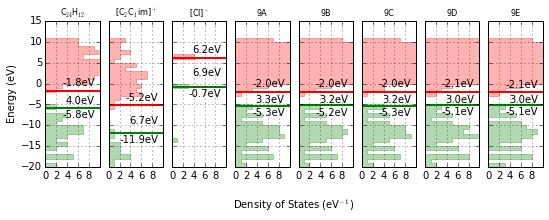

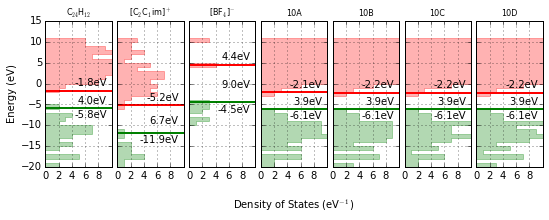

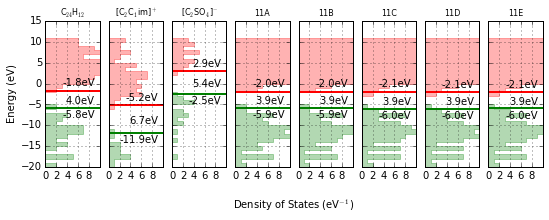

In [484]:
def plot_dos(mols, titles, ubound=10, lbound=-20, ufreq=10, linewidth=2, gap=True):
    fig_dos, axes = plt.subplots(1,len(mols), sharex=True)
    for mol, ax, title in zip(mols, axes, titles):
        mol.plot_dos(ubound=ubound, lbound=lbound, ax=ax)
        ax.set_title(title, {'fontsize': 8})
        ax.tick_params(labelleft='off')
        ax.set_xticks([0,2,4,6,8])
        l=ax.legend()
        l.set_visible(False)
    
    for mol_ax, mol, mol_name in zip(axes, mols, titles):    
        homo, lumo = mol.get_orbital_energies(mol.get_orbital_homo_lumo())
        if ufreq:
            xlower, xupper = 0,ufreq
        else:
            xlower, xupper = mol_ax.get_xbound()
        mol_ax.plot([xlower, xupper], [homo,homo], 'g-', linewidth=linewidth)
        mol_ax.plot([xlower, xupper], [lumo,lumo], 'r-', linewidth=linewidth)
        mol_ax.annotate('{}eV'.format(homo.round(1)), xy=(xupper, homo), xytext=(-5, -10), ha='right',
                    textcoords='offset points')
        mol_ax.annotate('{}eV'.format(lumo.round(1)), xy=(xupper, lumo), xytext=(-5, 5), ha='right',
                    textcoords='offset points')
        gap = lumo-homo
        if gap: 
            mol_ax.annotate('{}eV'.format(gap.round(1)), xy=(xupper, homo+0.5*gap), xytext=(-5, -4), ha='right',
                    textcoords='offset points')

    axes[0].set_ylabel('Energy (eV)')
    axes[0].tick_params(labelleft='on')
    if ufreq: axes[0].set_xbound(0,ufreq)

    # The big subplot for x label
    ax = fig_dos.add_subplot(111)    
    ax.tick_params(top='off', bottom='off', left='off', right='off',
                   labelbottom='on', labelleft='on', pad=25)
    ax.set_xticklabels([])
    ax.set_yticklabels([])           
    ax.set_frame_on(False)
    ax.set_xlabel('Density of States (eV$^{-1}$)') 

    fig_dos.tight_layout(w_pad=0.1)
    return fig_dos

fig_dos={}
for anion, anion_mol, anion_name in zip(['cl', 'bf', 'etso'], [cl_mol, bf_mol, etso_mol], 
                                        ['[Cl]$^-$', '[BF$_4$]$^-$', '[C$_2$SO$_4$]$^-$']):
    a,b=[coro_mol, emim_mol, anion_mol],['C$_{24}$H$_{12}$','[C$_2$C$_1$im]$^+$',anion_name]
    for ix, df in il_coro_confs.get_table(filters={'Anion':anion,'Cation':'emim'}, mol=True).iterrows():
        a.append(df.Molecule)
        b.append(df.Letter)
    fig_dos[anion] = plot_dos(a, b)
    fig_dos[anion].set_size_inches(8,3)
    #fig_dos[anion].savefig('test_'+anion, dpi=400)

#'C$_{24}$H$_{12}$','[C2C1im]$^+$','[Cl]$^-$'

In [485]:
il_coro_confs.add_mol_property_subset(['HOMO', 'LUMO'], 'get_orbital_homo_lumo')
h, l= coro_mol.get_orbital_energies(coro_mol.get_orbital_homo_lumo())
coro_bg = l-h
print coro_bg
for ix, df in il_coro_confs._df.iterrows():
    h, l= df.Molecule.get_orbital_energies(df.Molecule.get_orbital_homo_lumo())
    print df.Letter, l-h-coro_bg

4.00633222091
9A -0.753755365885
9B -0.795116671161
9C -0.775252360075
9D -1.01797791472
9E -0.992399212774
10A -0.0884370014125
10B -0.081089927449
10C -0.108301312499
10D -0.106396515545
11A -0.106940743247
11B -0.0922465953195
11C -0.102314807788
11D -0.120274321921
11E -0.152927983981


In [486]:
h,l = il_coro_confs.get_molecule(23).get_orbital_homo_lumo()
print il_coro_confs.get_molecule(23).get_orbital_energies([l, h]).round(2)
h,l = il_coro_confs.get_molecule(24).get_orbital_homo_lumo()
print il_coro_confs.get_molecule(24).get_orbital_energies([l, h, h-6, h-28,h-42]).round(2)
h,l = il_coro_confs.get_molecule(46).get_orbital_homo_lumo()
print il_coro_confs.get_molecule(46).get_orbital_energies([l, h, h-11, h-14, h-54]).round(2)

[-2.03 -5.24]
[ -2.22  -6.12  -8.12 -11.35 -12.45]
[ -2.11  -6.    -8.04  -8.99 -13.41]


In [487]:
doc = pg.MSDocument()
doc.add_heading('Ionic Liquid Summary', level=0)
doc.add_mpl(fig_ecl, dpi=180, width=12)
doc.add_mpl(fig_ebf, dpi=180, width=12)
doc.add_mpl(fig_eetso, dpi=180, width=12)
doc.add_dataframe(ilg_df, sig_figures=4)
doc.add_mpl(ax_energy.get_figure(), dpi=96, height=8)
doc.add_mpl(fig_dos['cl'], dpi=200, width=12)
doc.add_mpl(fig_dos['bf'], dpi=200, width=12)
doc.add_mpl(fig_dos['etso'], dpi=200, width=12)
doc.save('For_Final_Report_IL_Coro.docx')

In [526]:
mol = il_coro_confs.get_molecule(19)
mol.get_opt_energy(units='kJmol-1', zpe_correct=True)

-4533997.2202275693

In [528]:
mol = il_coronene.get_molecule(9)
mol.get_opt_energy(units='kJmol-1', zpe_correct=True)

-2420523.0392994871